## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **load dataset**

In [2]:
##### load dataset ####
data = np.genfromtxt("data.csv", delimiter=",")

## **set prototype**

In [4]:
#### set prototype ####
X = data[:, :-1]
Y = data[:, -1]


## **show Plot data in 3D befor train**

In [5]:
##### Plot Samples in 3D #####

def plot(a, b):
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    b[0] = 2
    b[1] = 3
    c = (b)

    img = ax.scatter(a[:,0], a[:,1], a[:,2], c = c, cmap = 'hsv')
    fig.colorbar(img)
    plt.show()

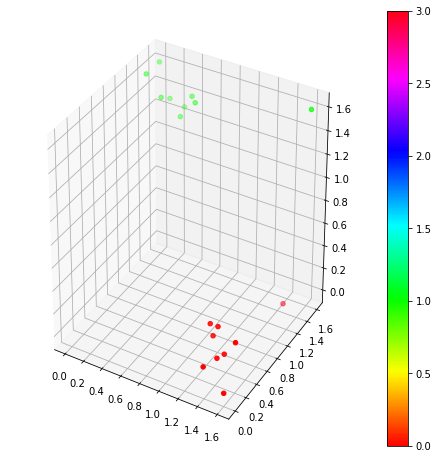

In [6]:
plot(X, Y)

## **LVQ1 Model Implementation From Scratch**

In [15]:
##### Implement your LVQ1 model here#####


class LVQ:

  def __init__(self, n_classes, learning_rate, n_epochs):
        self.n_classes = n_classes
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

  def fit(self, X, Y):
        
        # Initialize the prototypes with the first two training samples
        
        n_features = X.shape[1]
        classes = set(Y)
        self.W = np.zeros((len(classes), n_features))
        for i, c in enumerate(classes):
            self.W[i] = X[Y == c][0]

        # Loop through the number of epochs
        for epoch in range(self.n_epochs):
            
            # Loop through the remaining training samples
            for x, y in zip(X[2:], Y[2:]):
                
                # Calculate the distances between the test-sample and the prototypes
                distances = [np.linalg.norm(x-w) for w in self.W]
                
                # Find the index of the prototype with the smallest distance to the test-sample
                winner = np.argmin(distances)
                
                # Update the weight of the winning prototype
                if y == winner:
                    
                    # If the test-sample is from the same class as the winning prototype, move the prototype slightly in the direction of the test-sample
                    self.W[winner] += self.learning_rate * (x - self.W[winner])
                
                else:
                    
                    # If the test-sample is from a different class than the winning prototype, move the prototype slightly in the opposite direction of the test-sample
                    self.W[winner] -= self.learning_rate * (x - self.W[winner])

        # The LVQ1 model is now trained. It can be used to make predictions on new data.

  def predict(self, x):
        
        # Calculate the distances between the test-sample and the prototypes
        distances = [np.linalg.norm(x-w) for w in self.W]
        
        # Find the index of the prototype with the smallest distance
        winner = np.argmin(distances)
        
        return winner

  def new_weights(self, X, Y):
        
        # to get weights for plotting data after training
        x = np.concatenate((self.W, X))
        Y_old = Y.tolist()
        y = [[i] for i in range(self.n_classes)]
        for i in range(len(Y_old)):
            y.append(Y_old[i])
        
        return x, np.array(y)
  



## **Train Model**

In [16]:
##### Implement your LVQ1 model here#####
model = LVQ(n_classes=2, learning_rate= 0.03, n_epochs=10)
model.fit(X, Y)

## **show plot data in 3D after train**

<ipython-input-15-ee0faa4c0967>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return x, np.array(y)


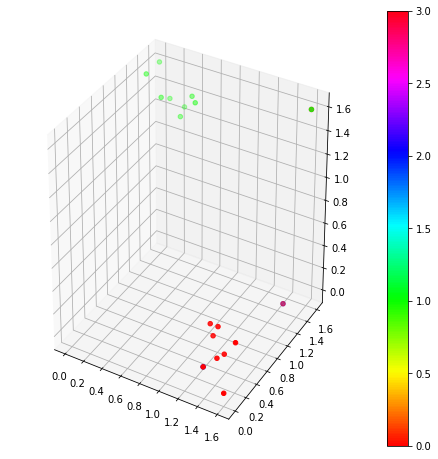

In [18]:
##### Plot Samples Again To Observe The Changes In Prototypes After Training #####
x, y = model.new_weights(X, Y)
plot(x, y)

## **Test Model**

In [20]:
##### Test The Model With The Given Sample #####

test_sample = np.array([[0.304, 1.488, 1.408]])
prediction = model.predict(test_sample)
print("the sample belongs to the class ", prediction)

the sample belongs to the class  2


# References

https://machinelearningmastery.com/implement-learning-vector-quantization-scratch-python/

https://medium.com/@matteo.arellano/learning-vector-quantization-lvq-from-scratch-python-c7a5abcd79bd

https://www.turing.com/kb/application-of-learning-vector-quantization

https://www.kaggle.com/alincijov/glass-classification-lvq-from-scratch

https://blog.faradars.org/lvq-network-in-python/

https://towardsdatascience.com/learning-vector-quantization-ed825f8c807d

https://likegeeks.com/3d-plotting-in-python/

https://www.youtube.com/watch?v=dT_2d5qPvHM

https://www.youtube.com/watch?v=BRdIcXqquQs